<a href="https://colab.research.google.com/github/bioai96/SKTFLYAI/blob/main/ML/%ED%85%90%EC%84%9C%ED%94%84%EB%A1%A4%EC%9A%B01_tf_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 단순 선형회귀 (Simple Linear Regression)
---

Tensorflow의 기능을 이용하여, 선형회귀를 구현한다

### 문제 0. 라이브러리

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings(action='ignore')

### 문제 1. 텐서플로우 버전 확인

In [3]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [4]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.0 kB/s 
     |████████████████████████████████| 5.8 MB 60.2 MB/s 
     |████████████████████████████████| 438 kB 63.3 MB/s 
     |████████████████████████████████| 1.6 MB 58.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [5]:
import tensorflow as tf

print(tf.__version__)

2.8.2


### 문제 2. 데이터 만들기

In [6]:
# 임의 데이터 작성 : [공부 시간, 점수]

data = [[2,81],[4,93],[6,91],[8,97]]

### 문제 2. X, y 데이터로 분리

* 종속변수와 독립변수로 분리

In [7]:
# 파이썬의 리스트 내포 

X = [i[0] for i in data]
y = [i[1] for i in data]

X = np.array(X)
y = np.array(y)


### 문제 3. 시각화

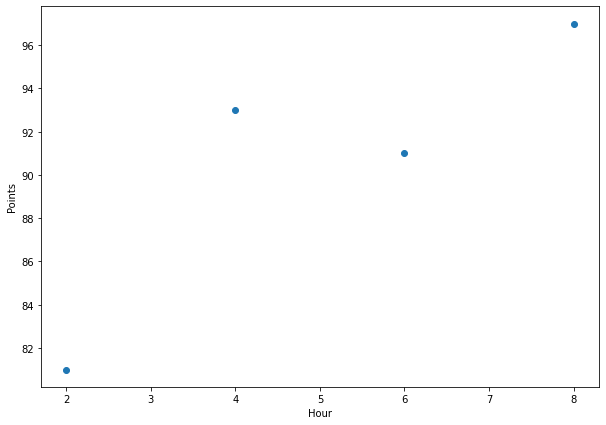

In [8]:
# 데이터의 산점도

plt.figure(figsize=(10,7))
plt.scatter(X,y)
plt.xlabel('Hour')
plt.ylabel('Points')
plt.show()

### 문제 4. 가설 

* 가설 : $ \hat{y}=Wx +b$

In [9]:
# 임의의 초기값 설정, 변수를 텐서플로우 변수로 정의하는 이유는 자동미분기능(GradientTape)을 사용하기 위함

W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W*X + b


In [10]:
hypothesis

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 4.5,  8.5, 12.5, 16.5], dtype=float32)>

Tensor에서 numpy array로 변환은 .numpy()함수를 사용합니다

In [11]:
# 초기값 확인
#Tensor에서 numpy array로 변환은 .numpy()함수 사용

W, W.numpy()

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>, 2.0)

#### 가설의 시각화 

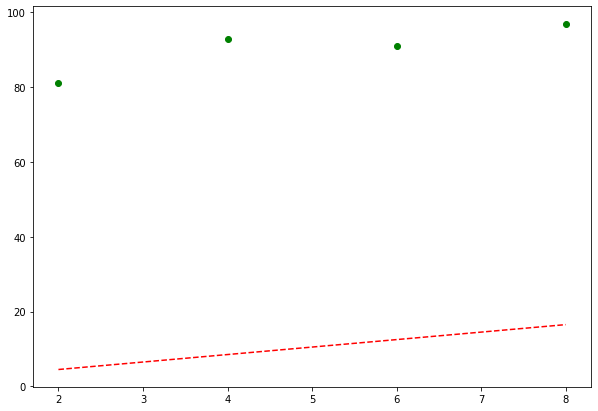

In [12]:
plt.figure(figsize=(10,7))
plt.plot(X,hypothesis.numpy(), 'r--')
plt.plot(X,y,'go')

### 6. 비용 함수 (Cost Function)

$$ \hat{y}=Wx +b$$
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ ({ y-\hat{y}_{ i } })^{ 2 } }  $$

In [13]:
# 현재 손실
cost = tf.reduce_mean(tf.square(hypothesis - y))
cost.numpy()

6408.75

### 7. 학습
#### 자동 미분 기능

* 텐서플로우의 자동미분 기능을 사용

In [14]:
# 손실함수의 미분값을 계산하세요

with tf.GradientTape() as type:
  hypothesis = W*X + b
  cost = tf.reduce_mean(tf.square(hypothesis - y))

W_grad, b_grad = type.gradient(cost, [W,b])

In [15]:
# W와 b 계산값을 출력

W_grad.numpy(), b_grad.numpy()


(-803.0, -160.0)

#### 가중치와 기울기 갱신

In [16]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.1>

In [17]:
# W와 b 계산값을 출력하세요

W.numpy(), b.numpy()


(10.03, 2.1)

#### 현재 상태 시각화

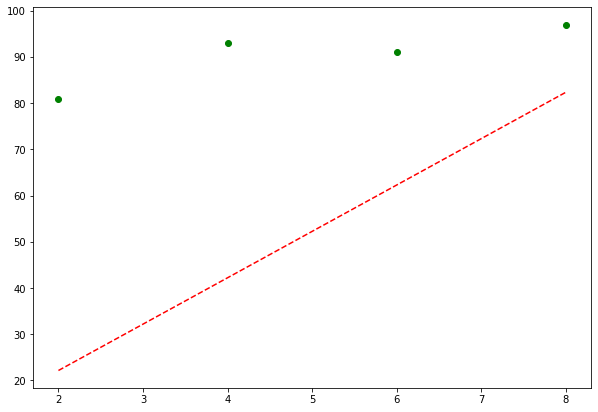

In [18]:
hypothesis = W*X + b

plt.figure(figsize=(10,7))
plt.plot(X,hypothesis.numpy(),'r--')
plt.plot(X,y,'go')
plt.show()

### 8. 경사하강법 (Gradient Descent)

In [25]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)
lr = 0.01
epochs = 2000

In [26]:
for i in range(epochs+1):
  with tf.GradientTape() as tape:
    hypothesis = W*X + b
    cost = tf.reduce_mean(tf.square(hypothesis-y))

  W_grad, b_grad = tape.gradient(cost, [W, b])
  W.assign_sub(lr*W_grad)
  b.assign_sub(lr*b_grad)
  
  if i%100 == 0:
    print(f"{i:5} | W={W.numpy():.4f} | b={b.numpy():.4f} | cost={cost: .6f}")

    0 | W=10.3900 | b=2.0100 | cost= 5710.350098
  100 | W=11.5285 | b=23.9284 | cost= 517.148865
  200 | W=8.9691 | b=39.2015 | cost= 274.046814
  300 | W=7.1196 | b=50.2388 | cost= 147.086487
  400 | W=5.7830 | b=58.2152 | cost= 80.781250
  500 | W=4.8170 | b=63.9795 | cost= 46.153404
  600 | W=4.1190 | b=68.1451 | cost= 28.069046
  700 | W=3.6145 | b=71.1555 | cost= 18.624388
  800 | W=3.2500 | b=73.3310 | cost= 13.691942
  900 | W=2.9865 | b=74.9032 | cost= 11.115941
 1000 | W=2.7961 | b=76.0394 | cost= 9.770640
 1100 | W=2.6585 | b=76.8604 | cost= 9.068078
 1200 | W=2.5591 | b=77.4538 | cost= 8.701128
 1300 | W=2.4872 | b=77.8826 | cost= 8.509480
 1400 | W=2.4353 | b=78.1925 | cost= 8.409400
 1500 | W=2.3978 | b=78.4164 | cost= 8.357142
 1600 | W=2.3707 | b=78.5782 | cost= 8.329845
 1700 | W=2.3511 | b=78.6952 | cost= 8.315588
 1800 | W=2.3369 | b=78.7797 | cost= 8.308147
 1900 | W=2.3267 | b=78.8408 | cost= 8.304251
 2000 | W=2.3193 | b=78.8850 | cost= 8.302218


#### 학습결과 시각화

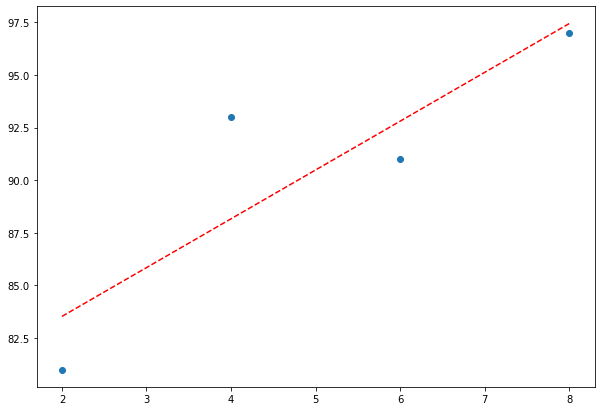

In [27]:
plt.figure(figsize =(10,7))
plt.plot(X,y, 'o')
plt.plot(X,hypothesis.numpy(), 'r--')
plt.show()

### 9. 예측하기

> * 5시간 공부하면 몇점 받을 수 있을까?

In [ ]:
W.numpy(), b.numpy()

In [28]:
(5*W + b).numpy()

90.481346

끝